# Time Series

## Components of a time series

We can model our time series as having three components,

$$ y(t) = \mathrm{drift} + \mathrm{seasonal} + \mathrm{noise}. $$

The components are defined as

1. **Drift**: An overall trend present in the time series. An example of a drift model is
$$ y(t) = \mu t. $$
Other commonly applied drift models are quadratic and exponential.

1. **Seasonality**: A periodic behavior existing in the time series. For a given frequency $f$, a common model is
$$ y(t) = A\sin(2\pi ft) + B\cos(2\pi ft). $$

1. **Noise**: The part of the time series remaining after removing drift and seasonality. It is the residual of a model containing drift and seasonality.

In [2]:
import numpy as np 
import datetime
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("/Users/rshah181/Desktop/AMADEUS/NIFTY100/TATASTEEL.csv").fillna(0)
df['Open'] = df['close']

In [4]:
df['datetime'] = df['datetime'].apply(lambda x : datetime.datetime.strptime(x[:-6], '%Y-%m-%d %H:%M:%S'))
df['date'] = df['date'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
df = df.set_index('datetime')
df = df[(df['date'] > datetime.datetime.strptime('2019-01-01', '%Y-%m-%d'))]

In [5]:
df

,open,high,low,close,volume,time,date,Open
datetime,,,,,,,,
2019-01-02,506.00,506.80,492.00,493.65,11747350,00:00:00,2019-01-02,493.65
2019-01-03,493.00,493.15,480.25,481.25,13532944,00:00:00,2019-01-03,481.25
2019-01-04,481.00,492.85,479.55,487.65,10480072,00:00:00,2019-01-04,487.65
2019-01-07,495.40,501.00,483.90,485.50,8406787,00:00:00,2019-01-07,485.50
2019-01-08,485.65,493.35,483.80,491.35,6269706,00:00:00,2019-01-08,491.35
...,...,...,...,...,...,...,...,...
2020-04-01,266.00,267.95,258.10,266.35,11965031,00:00:00,2020-04-01,266.35
2020-04-03,267.70,268.90,251.00,253.75,12528030,00:00:00,2020-04-03,253.75
2020-04-07,266.05,277.70,261.20,276.20,15956873,00:00:00,2020-04-07,276.20


Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

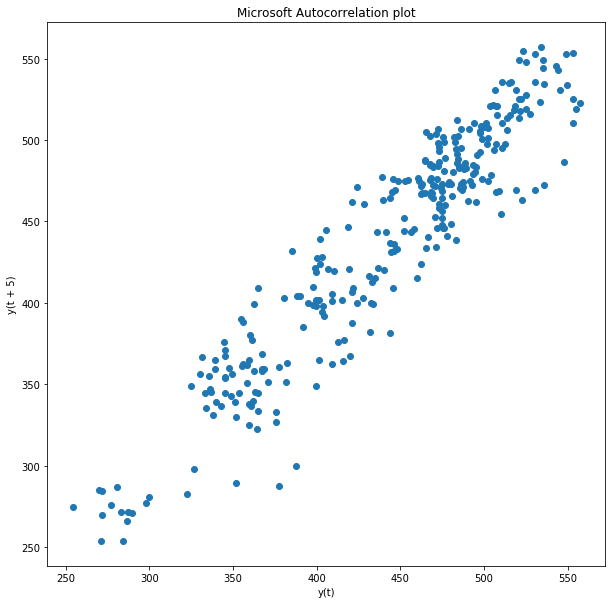

In [8]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Microsoft Autocorrelation plot')

### Autoregressive and moving average models

The autoregressive (AR) model of order $p$ states that the current time series value is linearly dependent on the past $p$ values with some white noise,

$$y_t = c + \alpha_1 y_{t-1} + \alpha_2 y_{t-2} + ... \alpha_p y_{t-p} + \epsilon_t = c + \sum^{p}_{p=1} \alpha_p y_{t-p} + \epsilon_t, $$

where $\alpha_p$ are the model parameters, $y_{t-p}$ are past time series values, $c$ is a constant, and $\epsilon_t$ is white noise. The name autoregressive refers to the model parameters being solved by applying regression with the time series values themselves. Our previous illustration discussing stationary signals is an autoregressive model of order one as the current value is equal to the scaled prior value plus some noise. Autoregressive models are great at capturing the mean reversion and momentum in the time series since it is based on a window of past values.

Another model is the moving average (MA) model. Despite similar names, the MA model and concept of moving averages are different and should not be confused. The MA model of order $q$ says that the time series is linearly dependent on current and past shock values or noise,

$$y_t = c + \epsilon_t + \beta_1 \epsilon_{t-1} + \beta_2 \epsilon_{t-2} + ... \beta_q \epsilon_{t-q} = c + \sum^{q}_{q=1} \beta_q \epsilon_{t-q} + \epsilon_t, $$

where $\beta_q$ are the model parameters. The MA model captures the persisting effect of shock events on future time series values. To get the capabilities of both models, AR and MA models are added, forming a more general time series model referred to as autoregressive and moving average (ARMA) model. The coefficients of the AR models are solved using a variety of methods such as linear least squares regression. MA coefficients are more computationally intensive to solve because shock values are not directly observed, requiring non-linear fitting algorithms. When using ARMA, the order of both AR and MA need to be specified and can be different.


## ARIMA

The ARMA model only works for a stationary process. One method to arrive at a stationary process is to apply a difference transformation, $\Delta y_t = y_t - y_{t-1}$. In our example of a random walk, the series was not stationary but the time series of the difference is stationary because it only depends on white Gaussian noise. The autoregressive integrated moving average (ARIMA) model is a general form of ARMA that applies differencing to the time series in the hopes of generating a stationary process. The ARIMA model is often written as $\mathrm{ARIMA}(p, d, q)$, where
* $p$: Number of terms to include in the AR model.
* $d$: The degree of differencing, how many times differencing is applied to the series.
* $q$: Number of terms to include in the MA model.

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


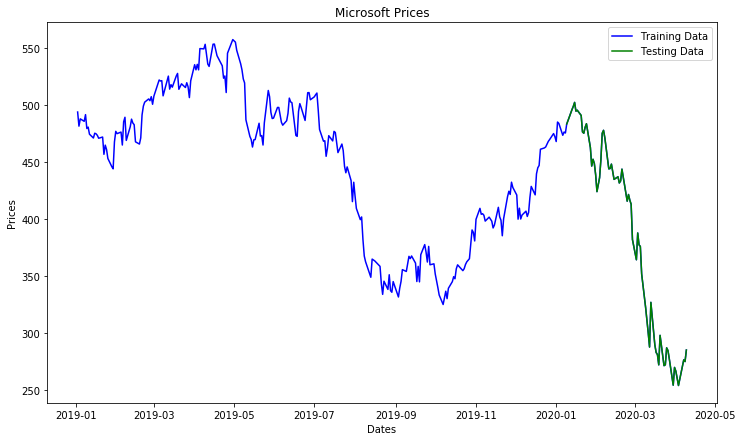

In [9]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.legend()

In [10]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [26]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = list(train_ar)
predictions = list()

In [27]:
model = ARIMA(history, order=(5,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast()

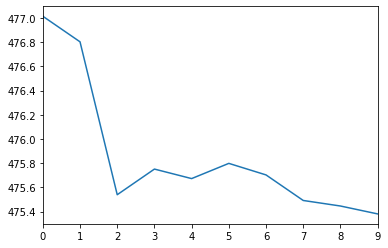

In [55]:
pd.Series(model_fit.forecast(10)[0]).plot()

In [1]:
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(airline['spread'])

In [43]:
model_fit.params

array([-7.38410810e-02, -7.04029465e-03, -6.37879947e-02, -2.08747386e-02,
        7.15638646e-06,  1.04947614e-01])

In [12]:
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)

Testing Mean Squared Error: 222.297


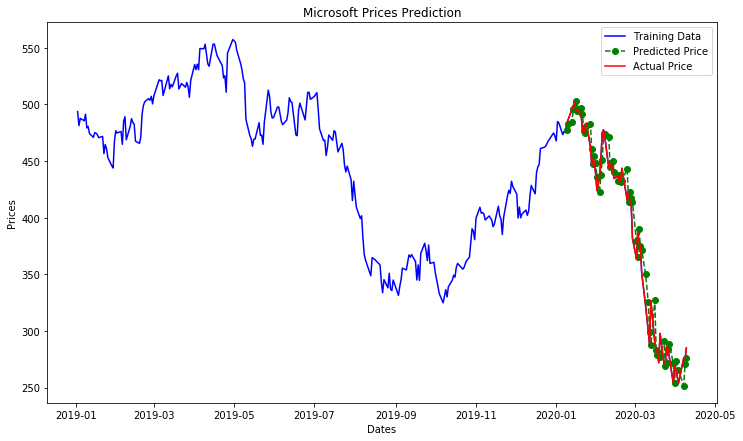

In [16]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [71]:
predictions = [x[0] for x in predictions]

In [72]:
result = pd.DataFrame({'Actual' : test_data['Open'], 'Prediction' : predictions})

In [73]:
result['Actual Shifted'] = result['Actual'].shift()

In [74]:
result['Actual Diff'] = result['Actual'] - result['Actual Shifted']
result['Pred Diff'] = result['Prediction'] - result['Actual Shifted']

In [75]:
result['Actual Diff'] = result['Actual Diff'].apply(lambda x : -1 if x < 0 else 1)
result['Pred Diff'] = result['Pred Diff'].apply(lambda x : -1 if x < 0 else 1)

In [76]:
result['Match'] = (result['Actual Diff'] == result['Pred Diff'])

In [77]:
result['Match'].sum()/result['Match'].count()

0.5238095238095238

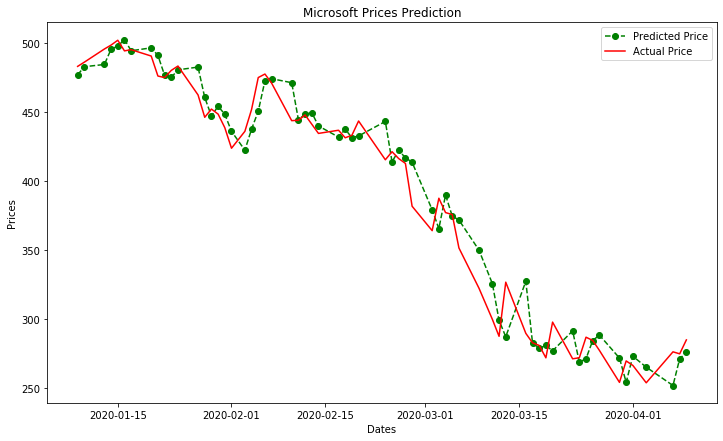

In [78]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.legend()
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

***